# <font color='#eb3483'> Classification Trees </font>

In this notebook, we'll be building a classification tree.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 

### <font color='#eb3483'> Import and Explore the Data </font>

We are going to use the [titanic dataset](https://www.kaggle.com/c/titanic/data) in this notebook. It contains data for passengers on the titanic. The goal is to predict whether or not they survived when the ship sank based on 13 features. Let's begin by importing the data from `seaborn`'s dataset repository:

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<font color='#eb3483'> Exercise: </font> Cross-tabulate the "survived" and "alive" columns. What do you notice? Now remove the "alive" column.

In [3]:
pd.crosstab(df.survived, df.alive)

alive,no,yes
survived,,
0,549,0
1,0,342


In [4]:
df.drop(columns='alive', inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


<font color='#eb3483'> Exercise: </font> Do the same for "embarked" and "embarked_town" and for "pclass" and "class". Remove "embarked_town" and "class".

In [5]:
pd.crosstab(df.embarked, df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


In [6]:
pd.crosstab(df.pclass, df["class"]) 
# note that "class" is a reserved word in python so we cannot use df.class to refer to this column

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


In [7]:
df.drop(columns=["embark_town","class"], inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True


<font color='#eb3483'> Exercise: </font> Have a look at the relationship between fare and class. Is it what you would expect?

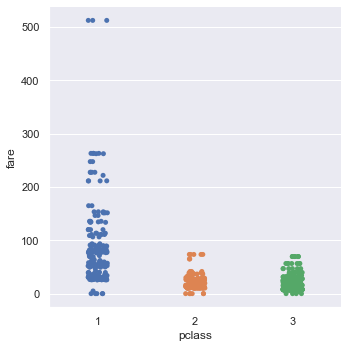

In [8]:
sns.catplot(x="pclass", y="fare", data=df)

<font color='#eb3483'> Exercise: </font> Now cross-tabulate the "sex" and "who" columns and the "sex" and "adult_male". What's going on here?

In [9]:
pd.crosstab(df.sex, df.who)

who,child,man,woman
sex,,,
female,43,0,271
male,40,537,0


In [10]:
pd.crosstab(df.sex, df.adult_male)

adult_male,False,True
sex,,
female,314,0
male,40,537


<font color='#eb3483'> Exercise: </font> We already have "sex" and "age" in the dataset. Drop the "who" and "adult_male" columns. 

In [11]:
df.drop(columns=['who', 'adult_male'], inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,C,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,C,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,True


<font color='#eb3483'> Exercise: </font> Which columns (if any) have missing values? 

In [12]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
alone         0
dtype: int64

<font color='#eb3483'> Exercise: </font> Remove any columns with more than 20% missing and then drop the rows that have missing data.  

In [13]:
df.isna().sum()/df.shape[0]

survived    0.000000
pclass      0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
fare        0.000000
embarked    0.002245
deck        0.772166
alone       0.000000
dtype: float64

In [14]:
df.drop(columns='deck', inplace=True)
df.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


<font color='#eb3483'> Exercise: </font> Investigate the remaining categorical variables. How many classes does each one have and how many observations are in each class. Use one-hot encoding to convert these to dummy variables for inclusion in our model.

In [15]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
alone          bool
dtype: object

In [16]:
df.sex.value_counts(normalize=True)

male      0.636236
female    0.363764
Name: sex, dtype: float64

In [17]:
df.embarked.value_counts(normalize=True) 
# very few passengers embarked at Queenstown

S    0.778090
C    0.182584
Q    0.039326
Name: embarked, dtype: float64

In [18]:
df.alone.value_counts(normalize=True)
# that's interesting - more than half the passengers were travelling along!

True     0.564607
False    0.435393
Name: alone, dtype: float64

In [19]:
df = pd.get_dummies(df)
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,True,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,False,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,1


We don't need "sex_female" and "sex_male" in our model (they contain the same information). Let's remove "sex_female" and rename "sex_male" as just "male".

Let's also convert the boolean "alone" column into zeros and ones.

In [20]:
df.drop(columns="sex_female", inplace=True)
df.rename(columns={"sex_male":"male"}, inplace=True)
df['alone'] = df.alone*1
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,0,1


Note that, strictly speaking, "pclass" is a categorical variable that is being represented as an integer. Because there is a natural ordering to the categories (1 is better than 2 is better than 3), it's fine to include it as is. A rule such as "pclass < 3" makes sense!

## <font color='#eb3483'> Fit a Classification Tree </font>

As with regression trees, classification trees are available via the `sklearn.tree` module. Let's import the `DecisionTreeClassifier` and have a look at its documentation. Take note of all the arguments that you could use to try and prevent overfitting (by restricting the tree size).

In [21]:
from sklearn.tree import DecisionTreeClassifier
?DecisionTreeClassifier

Fit a classification tree to our cleaned dataset.

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X = df.iloc[:,1:], y = df.survived)

DecisionTreeClassifier()

<font color='#eb3483'> Exercise: </font> How many leaf nodes does it have?

In [23]:
tree.get_n_leaves()

169

<font color='#eb3483'> Exercise: </font> What is its classification accuracy on the training data?

In [24]:
y_pred = tree.predict(df.iloc[:,1:])
print('Classification accuracy = ', np.sum(df.survived==y_pred)/df.shape[0])

conf_matrix = pd.crosstab(df.survived, y_pred)
conf_matrix

Classification accuracy =  0.9859550561797753


col_0,0,1
survived,,
0,424,0
1,10,278


<font color='#eb3483'> Exercise: </font> Use cost complexity pruning to identify the subtree that performs best on unseen data.

Text(0, 0.5, 'Training Error')

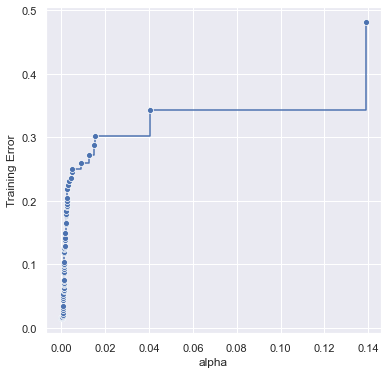

In [25]:
path = tree.cost_complexity_pruning_path(X=df.iloc[:,1:], y=df.survived)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

p = sns.lineplot(x=ccp_alphas, y=impurities, marker='o', drawstyle='steps-post')
p.set_xlabel('alpha')
p.set_ylabel('Training Error')

In [26]:
from sklearn.model_selection import cross_val_score

cv_accuracy = []

for a in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=a)
    cv_score = cross_val_score(model, X=df.iloc[:,1:], y=df.survived , scoring="accuracy", cv=10).mean()
    cv_accuracy.append(cv_score)

(0.76, 0.82)

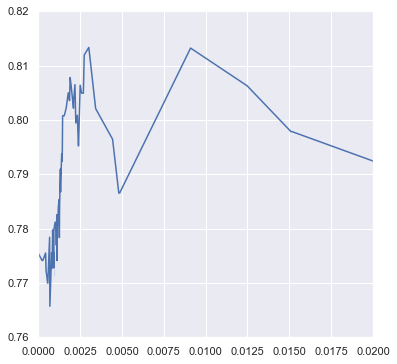

In [27]:
p = sns.lineplot(x=ccp_alphas, y=cv_accuracy)
p.set_xlim(0,0.02)
p.set_ylim(0.76,0.82)

In [32]:
tree_pruned = DecisionTreeClassifier(ccp_alpha=0.01)
tree_pruned.fit(X = df.iloc[:,1:], y = df.survived)

DecisionTreeClassifier(ccp_alpha=0.01)

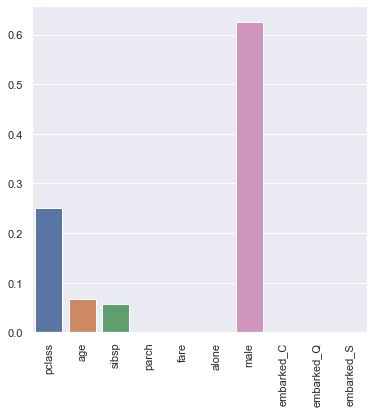

In [33]:
p = sns.barplot(x=df.columns[1:], y=tree_pruned.feature_importances_)
p = p.set_xticklabels(labels=df.columns[1:], rotation=90)